In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

In [70]:
train = pd.read_csv("train.csv")

In [71]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [74]:
# show the outlier rows
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [75]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [76]:
# Joining of test and train data
train_len = len(train)
dataset =  pd.concat(objs=[train], axis=0).reset_index(drop=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [77]:
# 2.4 check for null and missing values
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

# Check for Null values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [78]:
# Treating Null Values
#Fill Fare missing values with the median value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

In [79]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [80]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [81]:
### Summarize data
# Summarie and statistics
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


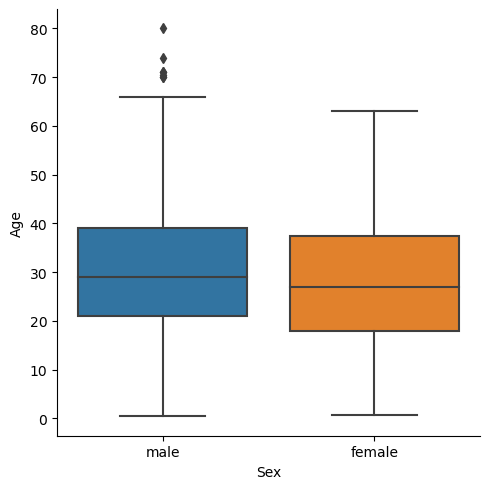

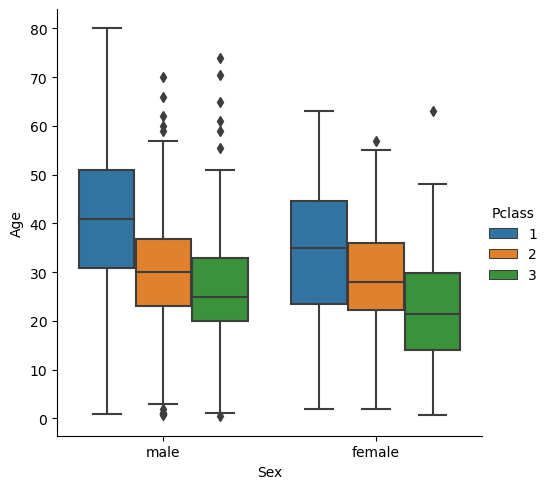

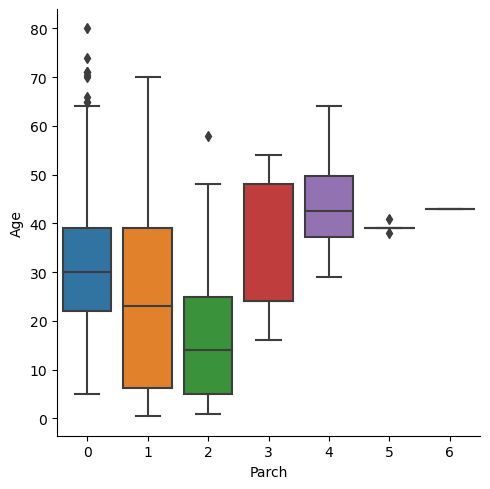

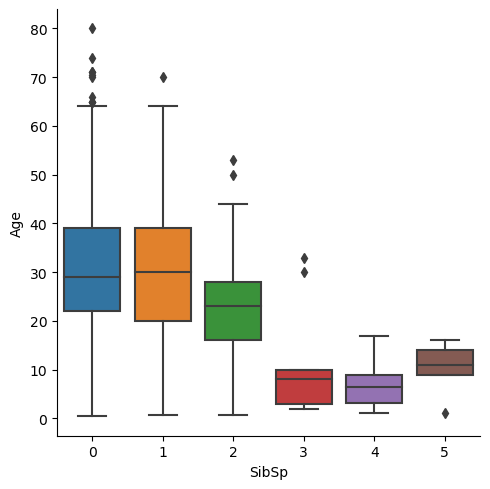

In [82]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.catplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.catplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.catplot(y="Age",x="SibSp", data=dataset,kind="box")

In [83]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

print(age_pred)

C:\Users\Bhavanasri\AppData\Local\Temp\ipykernel_18864\771880102.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'].iloc[i] = age_pred


13.5


In [84]:
# Feature Analysis

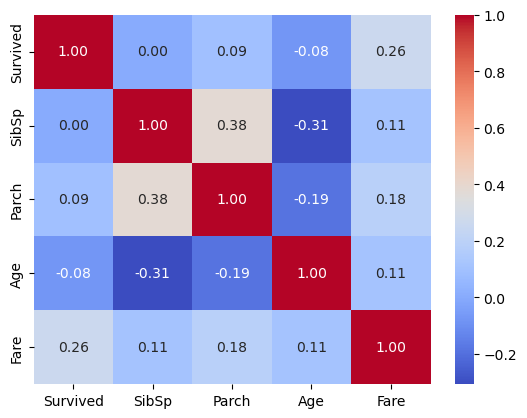

In [85]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [86]:
dataset["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 881 entries, 0 to 880
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
881 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [87]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [88]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

In [89]:
# Create a family size descriptor from SibSp and Parch
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [90]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF
461,469,0,3,"Scanlan, Mr. James",male,26.0,0,0,36209,7.7250,X,Q,2,1,1,0,0,0
597,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,X,C,2,1,1,0,0,0
417,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,X,S,2,3,0,0,1,0
751,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,X,S,2,1,1,0,0,0
818,827,0,3,"Lam, Mr. Len",male,26.0,0,0,1601,56.4958,X,S,2,1,1,0,0,0


In [91]:
dataset=dataset.drop(['Name'],axis=1)

In [92]:
dataset["Ticket"].value_counts()

347082      7
1601        7
3101295     6
CA 2144     6
347088      6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [93]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()


0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [94]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF
0,1,0,3,male,22.0,1,0,A5,7.2500,X,S,2,2,0,1,0,0
1,2,1,1,female,38.0,1,0,PC,71.2833,C,C,1,2,0,1,0,0
2,3,1,3,female,26.0,0,0,STONO2,7.9250,X,S,1,1,1,0,0,0
3,4,1,1,female,35.0,1,0,X,53.1000,C,S,1,2,0,1,0,0
4,5,0,3,male,35.0,0,0,X,8.0500,X,S,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,male,27.0,0,0,X,13.0000,X,S,3,1,1,0,0,0
877,888,1,1,female,19.0,0,0,X,30.0000,B,S,1,1,1,0,0,0
878,889,0,3,female,13.5,1,2,WC,23.4500,X,S,1,4,0,0,1,0
879,890,1,1,male,26.0,0,0,X,30.0000,C,C,2,1,1,0,0,0


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Sex          881 non-null    object 
 4   Age          881 non-null    float64
 5   SibSp        881 non-null    int64  
 6   Parch        881 non-null    int64  
 7   Ticket       881 non-null    object 
 8   Fare         881 non-null    float64
 9   Cabin        881 non-null    object 
 10  Embarked     881 non-null    object 
 11  Title        881 non-null    int32  
 12  Fsize        881 non-null    int64  
 13  Single       881 non-null    int64  
 14  SmallF       881 non-null    int64  
 15  MedF         881 non-null    int64  
 16  LargeF       881 non-null    int64  
dtypes: float64(2), int32(1), int64(10), object(4)
memory usage: 113.7+ KB


In [96]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dataset["Sex"]=LE.fit_transform(dataset["Sex"])
dataset["Ticket"]=LE.fit_transform(dataset["Ticket"])
dataset["Cabin"]=LE.fit_transform(dataset["Cabin"])
dataset["Embarked"]=LE.fit_transform(dataset["Embarked"])

In [97]:
dataset.sample(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF
531,539,0,3,1,26.0,0,0,30,14.5,8,2,2,1,1,0,0,0
833,842,0,2,1,16.0,0,0,21,10.5,8,2,2,1,1,0,0,0


In [98]:
x=dataset.drop(["Survived"],axis=1)
y=dataset["Survived"]

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [100]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [101]:
kfold = StratifiedKFold(n_splits=10)

In [102]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree",
"RandomForest","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.633561,0.019008,SVC
1,0.745755,0.038104,DecisionTree
2,0.792676,0.045579,RandomForest
3,0.804145,0.038163,GradientBoosting
4,0.751449,0.043414,MultipleLayerPerceptron
5,0.623622,0.030648,KNeighboors
6,0.794185,0.062247,LogisticRegression
7,0.824004,0.051769,LinearDiscriminantAnalysis


In [103]:
cv_res.sort_values(by=['CrossValMeans'])

,CrossValMeans,CrossValerrors,Algorithm
5,0.623622,0.030648,KNeighboors
0,0.633561,0.019008,SVC
1,0.745755,0.038104,DecisionTree
4,0.751449,0.043414,MultipleLayerPerceptron
2,0.792676,0.045579,RandomForest
6,0.794185,0.062247,LogisticRegression
3,0.804145,0.038163,GradientBoosting
7,0.824004,0.051769,LinearDiscriminantAnalysis


In [104]:
# Hyper Parameter Tuning using Grid Search CV

In [105]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8097987927565391

In [106]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


C:\Users\Bhavanasri\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


0.8041448692152917

In [107]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.6307042253521128

In [108]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# create a logistic regression object
lr = LogisticRegression(solver='liblinear', max_iter=1000)

# create a grid search object with 5-fold cross-validation
gsLG = GridSearchCV(lr, param_grid, cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)

# fit the grid search object to the data
gsLG.fit(X_train, Y_train)

LR_best = gsLG.best_estimator_

# Best score
gsLG.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.8240241448692153

In [109]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# create an MLP object
mlp = MLPClassifier(max_iter=1000)

# define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
}

# create a grid search object with 5-fold cross-validation
gsMLP = GridSearchCV(mlp, param_grid, cv=5,scoring='accuracy',n_jobs=4,verbose=1)

# fit the grid search object to the data
gsMLP.fit(X_train, Y_train)

MLP_best = gsMLP.best_estimator_

# Best score
gsMLP.best_score_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.7982877406281661

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# create an LDA object
lda = LinearDiscriminantAnalysis()

# define the parameter grid to search over
param_grid = {
    'solver': ['svd', 'lsqr'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],
    'tol': [0.0001, 0.001, 0.01],
}

# create a grid search object with 5-fold cross-validation
gsLDA = GridSearchCV(lda, param_grid, cv=5,scoring='accuracy',n_jobs=4,verbose=1)

# fit the grid search object to the data
gsLDA.fit(X_train, Y_train)

LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Bhavanasri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhavanasri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhavanasri\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFaile

0.8238905775075989

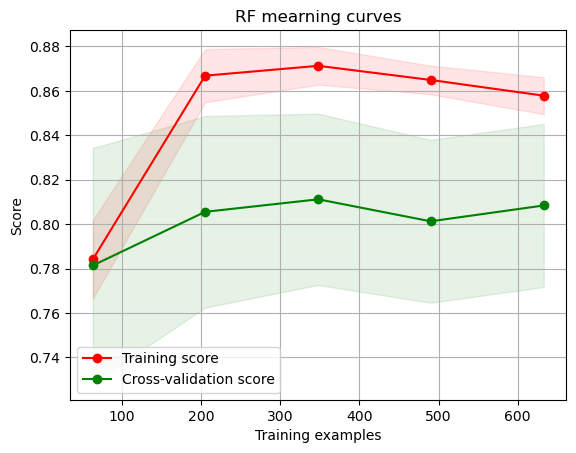

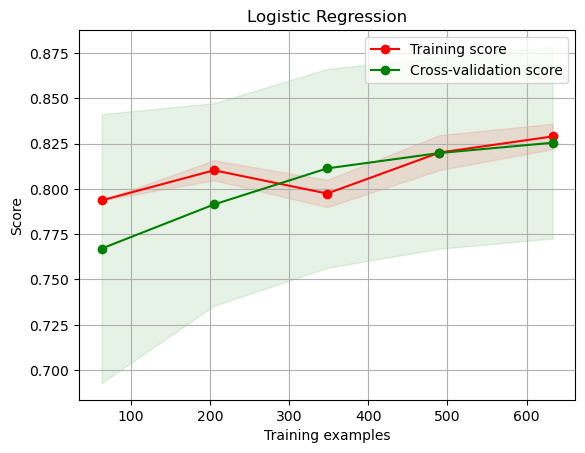

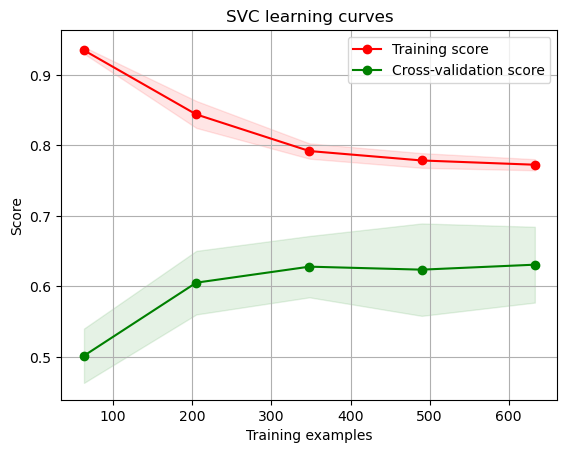

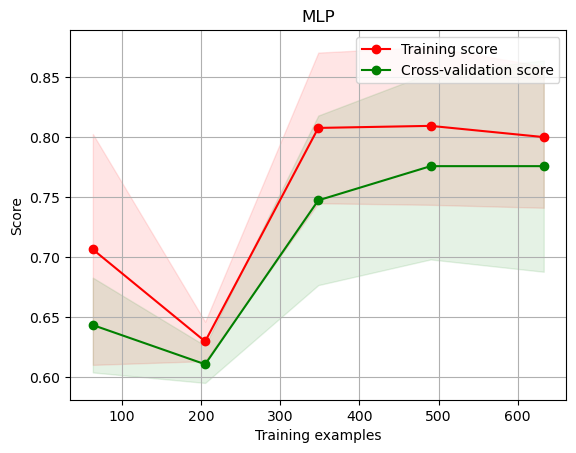

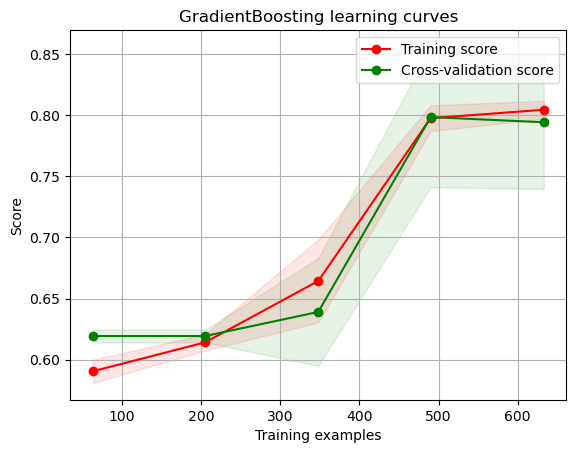

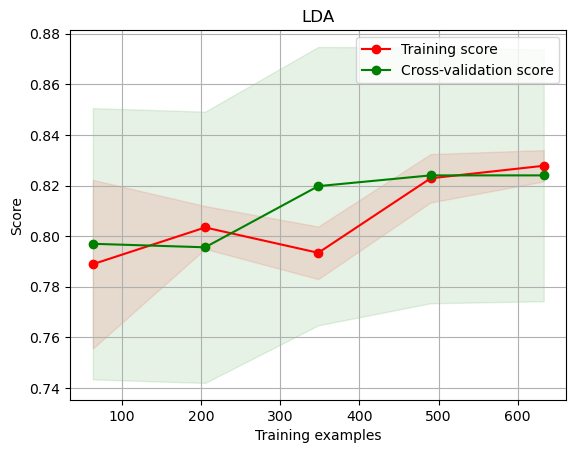

In [111]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLG.best_estimator_,"Logistic Regression",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsMLP.best_estimator_,"MLP",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLDA.best_estimator_,"LDA",X_train,Y_train,cv=kfold)



In [112]:
### Prediction
RF_Y_pred=gsRFC.predict(X_test)
LR_Y_pred=gsLG.predict(X_test)
SVC_Y_pred=gsSVMC.predict(X_test)
MLP_Y_pred=gsMLP.predict(X_test)
GBC_Y_pred=gsGBC.predict(X_test)
LDA_Y_pred=gsLDA.predict(X_test)

from sklearn.metrics import accuracy_score
LDA_acc=accuracy_score(LDA_Y_pred,Y_test)

from sklearn.metrics import accuracy_score
RF_acc=accuracy_score(RF_Y_pred,Y_test)

from sklearn.metrics import accuracy_score
SVC_acc=accuracy_score(SVC_Y_pred,Y_test)

from sklearn.metrics import accuracy_score
MLP_acc=accuracy_score(MLP_Y_pred,Y_test)

from sklearn.metrics import accuracy_score
GBC_acc=accuracy_score(GBC_Y_pred,Y_test)

from sklearn.metrics import accuracy_score
LR_acc=accuracy_score(LR_Y_pred,Y_test)

print('RF :',RF_acc)
print('LR :',LR_acc)
print('SVC :',SVC_acc)
print('GBC :',GBC_acc)
print('MLP :',MLP_acc)
print('LDA :',LDA_acc)

RF : 0.8587570621468926
LR : 0.8305084745762712
SVC : 0.6779661016949152
GBC : 0.807909604519774
MLP : 0.8192090395480226
LDA : 0.8418079096045198


In [113]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('LR', LR_best),
('svc', SVMC_best), ('MLP',MLP_best),('gbc',GBC_best),('LDA',LDA_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [114]:
y_pred = pd.Series(votingC.predict(x_test), name="Survived")
y_pred

NameError: name 'x_test' is not defined

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
Voting_acc=accuracy_score(y_test,y_pred)
Voting_acc

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# define individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = LinearDiscriminantAnalysis()

# create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('RFC', clf2), ('LDA', clf3)], voting='hard')

# train the voting classifier
voting_clf.fit(X_train, y_train)

# predict on the test set
Voting_HardY_pred = voting_clf.predict(X_test)


# evaluate the accuracy of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# create a synthetic dataset
x, y = make_classification(random_state=1)

# define individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = SVC(random_state=1, probability=True)

# create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('RFC', clf2), ('LDA', clf3)], voting='hard')

# evaluate the accuracy of the voting classifier using cross-validation
scores = cross_val_score(voting_clf, x, y, cv=5)
mean_accuracy = scores.mean()

print("Mean accuracy:", mean_accuracy)

from sklearn.metrics import accuracy_score
Voting_hard_acc=accuracy_score(Voting_HardY_pred,Y_test)
Voting_hard_acc